<a href="https://colab.research.google.com/github/dizzySummer/Machine-Learning-on-UCI-Datasets/blob/master/myhealthdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Anova exercise?
H0:μSpring=μSummer=μAutumn=μWinter 
H1:μSpring!=μSummer!=μAutumn!=μWinter 

In [1]:
# %run -i 'apple-health-data-parser' 'export.xml' 
%run -i '/content/drive/MyDrive/apple-health-data-parser.py' '/content/drive/MyDrive/export.xml'

Reading data from /content/drive/MyDrive/export.xml . . . done
Unexpected node of type ExportDate.

Tags:
ExportDate: 1
Me: 1
Record: 36894

Fields:
HKCharacteristicTypeIdentifierBiologicalSex: 1
HKCharacteristicTypeIdentifierBloodType: 1
HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse: 1
HKCharacteristicTypeIdentifierDateOfBirth: 1
HKCharacteristicTypeIdentifierFitzpatrickSkinType: 1
creationDate: 36894
device: 36894
endDate: 36894
sourceName: 36894
sourceVersion: 36758
startDate: 36894
type: 36894
unit: 36758
value: 36895

Record types:
DistanceWalkingRunning: 10895
FlightsClimbed: 904
HeadphoneAudioExposure: 2632
SleepAnalysis: 136
StepCount: 10891
WalkingAsymmetryPercentage: 2094
WalkingDoubleSupportPercentage: 3106
WalkingSpeed: 3118
WalkingStepLength: 3118

Opening /content/drive/MyDrive/StepCount.csv for writing
Opening /content/drive/MyDrive/DistanceWalkingRunning.csv for writing
Opening /content/drive/MyDrive/FlightsClimbed.csv for writing
Opening /content/drive/MyDr

In [2]:
import numpy as np
import pandas as pd
import glob
import time
from datetime import datetime

In [3]:
df=pd.read_csv("/content/drive/MyDrive/StepCount.csv")
df.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 20:44:18 +0200,2019-07-10 20:33:03 +0200,2019-07-10 20:33:18 +0200,19
1,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 21:00:53 +0200,2019-07-10 20:48:06 +0200,2019-07-10 20:49:53 +0200,24
2,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 21:10:29 +0200,2019-07-10 20:58:50 +0200,2019-07-10 21:08:51 +0200,1201
3,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 21:19:54 +0200,2019-07-10 21:08:51 +0200,2019-07-10 21:18:52 +0200,1030
4,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 21:29:55 +0200,2019-07-10 21:18:52 +0200,2019-07-10 21:28:53 +0200,976


In [4]:
from datetime import datetime
df['Date'] = pd.to_datetime(df.endDate).dt.strftime('%Y-%m-%d')
df

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,Date
0,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 20:44:18 +0200,2019-07-10 20:33:03 +0200,2019-07-10 20:33:18 +0200,19,2019-07-10
1,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 21:00:53 +0200,2019-07-10 20:48:06 +0200,2019-07-10 20:49:53 +0200,24,2019-07-10
2,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 21:10:29 +0200,2019-07-10 20:58:50 +0200,2019-07-10 21:08:51 +0200,1201,2019-07-10
3,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 21:19:54 +0200,2019-07-10 21:08:51 +0200,2019-07-10 21:18:52 +0200,1030,2019-07-10
4,Yi,12.3,"<<HKDevice: 0x281454050>, name:iPhone, manufac...",StepCount,count,2019-07-10 21:29:55 +0200,2019-07-10 21:18:52 +0200,2019-07-10 21:28:53 +0200,976,2019-07-10
...,...,...,...,...,...,...,...,...,...,...
10886,Yi,14.0,"<<HKDevice: 0x281457ca0>, name:iPhone, manufac...",StepCount,count,2020-11-17 19:41:42 +0200,2020-11-17 19:22:43 +0200,2020-11-17 19:32:43 +0200,1305,2020-11-17
10887,Yi,14.0,"<<HKDevice: 0x281457ca0>, name:iPhone, manufac...",StepCount,count,2020-11-17 19:51:26 +0200,2020-11-17 19:32:43 +0200,2020-11-17 19:42:42 +0200,1339,2020-11-17
10888,Yi,14.0,"<<HKDevice: 0x281457ca0>, name:iPhone, manufac...",StepCount,count,2020-11-17 19:57:30 +0200,2020-11-17 19:42:42 +0200,2020-11-17 19:52:42 +0200,1343,2020-11-17
10889,Yi,14.0,"<<HKDevice: 0x281457ca0>, name:iPhone, manufac...",StepCount,count,2020-11-17 20:07:48 +0200,2020-11-17 19:52:42 +0200,2020-11-17 19:58:39 +0200,720,2020-11-17


In [5]:
df=df[['Date','value']]
df.head(20)

,Date,value
0,2019-07-10,19
1,2019-07-10,24
2,2019-07-10,1201
3,2019-07-10,1030
4,2019-07-10,976
5,2019-07-10,1094
6,2019-07-10,920
7,2019-07-10,1038
8,2019-07-10,1144
9,2019-07-10,1210


In [6]:
df=df.groupby(['Date']).agg({'value':np.sum})
df

,value
Date,
2019-07-10,9373
2019-07-11,14809
2019-07-12,13218
2019-07-13,16455
2019-07-14,15621
...,...
2020-11-13,11931
2020-11-14,12153
2020-11-15,10425


In [7]:
df.to_csv("stepCount.csv")

In [8]:
test=pd.read_csv("stepCount.csv")
test

,Date,value
0,2019-07-10,9373
1,2019-07-11,14809
2,2019-07-12,13218
3,2019-07-13,16455
4,2019-07-14,15621
...,...,...
491,2020-11-13,11931
492,2020-11-14,12153
493,2020-11-15,10425
494,2020-11-16,16322


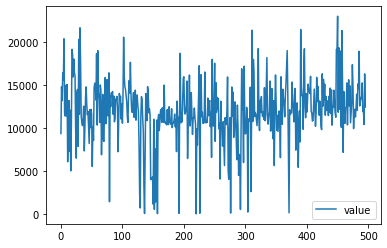

In [16]:
from matplotlib import pyplot
test.plot()
pyplot.show()


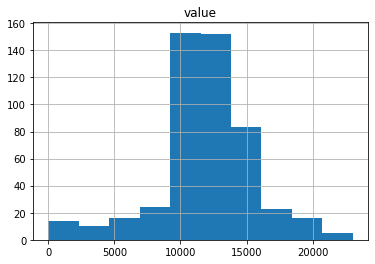

In [18]:
test.hist()
pyplot.show()

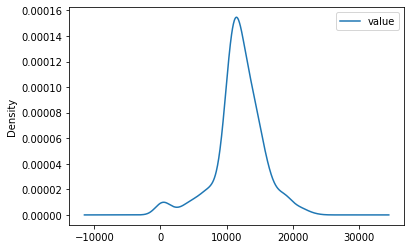

In [19]:
test.plot(kind='kde')
pyplot.show()